# Figures 9, 10, 11: 1D Scaling Laws

## 1D Simulation Results

Primary pyKO output files too big for data repository.
Make pickle file with the extracted data.


In [1]:
%run import-modules-grid

import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

from copy import deepcopy

!jupyter --version

G=6.6743e-11 # N m2/kg 

plt.rcParams.update(plt.rcParamsDefault)


Platform:  Darwin Kernel Version 24.1.0: Thu Oct 10 21:00:32 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T6030
python version:  3.11.10
matplotlib version:  3.9.2
hvplot version:  0.11.0
numpy version:  2.1.2
pandas version:  2.2.3
pickle version:  4.0
yaml version:  6.0.2
pint version:  0.24.3
pyko version:  v0.8.3-dev-2024-05-12
print eos_table version:  v1.1.5b

Number of CPUs in the system: 12


Selected Jupyter core packages...
IPython          : 8.28.0
ipykernel        : 6.29.5
ipywidgets       : 8.1.5
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : 2.14.2
jupyterlab       : 4.2.5
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.3


In [2]:
# data structure for the pyKO calculation

class plume_class:
    """Class to hold plume scaling data."""  # this is a documentation string for this class
    def __init__(self): # self is the default name of the object for internal referencing of the variables in the class
        """A function to initialize the class object.""" # this is a documentation string for this function
        self.rplumeinitarr = []   
        self.pinitarr    = []
        self.velinitarr = []
        self.einitarr  = []
        self.minitarr = []
        self.rhoinitarr = [] 
        self.rstallarr = []
        self.tstallarr = []
        self.vkearr = []
        self.labelneb  = []
        self.pneb  = []
        self.rhonebarr = []
        self.gammanebarr = []
        self.csnebarr = []
        self.frhonebref = []
        self.symarr = []
        self.cauchy = []
        self.pimass = []
        self.pitime = []
        self.piradius = []

## Read in original pyKO data 

Read original data then save in a pickle file for distribution. Files are too large for GitHub.

In [3]:
if 0: 
    # scripts that processed the original pyKO data files are included in the repository
    # the pyKO input files are provided in the repository to replicate the simulations
    # water plumes into a dusty gas
    %run ./pyko-sims/water-dig/gather-energies.py
    outputfilename='./data/scaling-dig.pkl'
    with open(outputfilename,"wb") as f:
        pickle.dump(plume,f) 
    
    # silica plumes into an ideal gas
    %run ./pyko-sims/silica/gather-energies.py
    outputfilename='./data/scaling-silica.pkl'
    with open(outputfilename,"wb") as f:
        pickle.dump(plume,f) 
    
    # water plumes into an ideal gas
    %run ./pyko-sims/water/gather-energies.py
    outputfilename='./data/scaling-water.pkl'
    with open(outputfilename,"wb") as f:
        pickle.dump(plume,f) 
   

## Read in extracted pyKO data

Read in pickle files included in supplemental materials.

In [4]:
outputfilename='./data/scaling-water.pkl'
with open(outputfilename,"rb") as f:
    plumewater=pickle.load(f)
outputfilename='./data/scaling-silica.pkl'
with open(outputfilename,"rb") as f:
    plumesilica=pickle.load(f)
outputfilename='./data/scaling-dig.pkl'
with open(outputfilename,"rb") as f:
    plumedig=pickle.load(f)


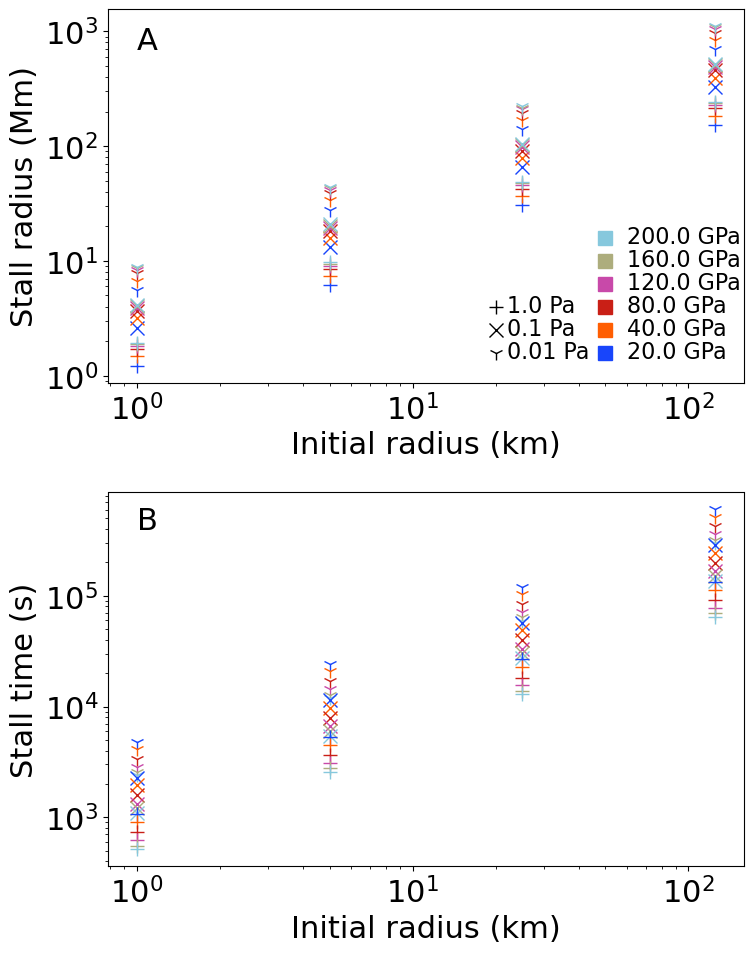

In [17]:
#for ineb in range(len(plumewater.pneb)):
#    for ipp in range(len(plumewater.pinitarr)):
#        plt.plot(plumewater.cauchy[ipp,:,ineb],plumewater.pimass[ipp,:,ineb],plumewater.symarr[ineb],label=str(plumewater.pinitarr[ipp]/1.e9)+' GPa, '+plumewater.pneb[ineb])

figure, ax = plt.subplots(2, 1,figsize=(8,10)) 
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.markersize'] = 10

#plumewater.symarr = ['x','>','<']
plumewater.symarr = ['1','x','+']
#plumesilica.symarr= ['.','1','3']
#pcol = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
pcol = ["#1845fb", "#ff5e02", "#c91f16", "#c849a9", "#adad7d", "#86c8dd", "#578dff", "#656364"]
i=0


for ineb in range(len(plumewater.pneb)):
    for ipp in range(len(plumewater.pinitarr)):
        ax[i].plot(plumewater.rplumeinitarr/1.e3,plumewater.rstallarr[ipp,:,ineb]/1.e6,plumewater.symarr[ineb],color=pcol[ipp],label=str(plumewater.pinitarr[ipp]/1.e9)+' GPa, '+str(plumewater.presnebarr[ineb])+' Pa')

# add shock pressure legend
ineb=0
yval=np.power(100,(np.arange(6)+1)/10)
for ipp in range(len(plumewater.pinitarr)):
    ax[i].plot(50,yval[ipp],'s',color=pcol[ipp])#,label='water-dusty gas '+str(plumedig.pinitarr[ipp]/1.e9)+' GPa')
    ax[i].text(60,yval[ipp]*.9,str(plumewater.pinitarr[ipp]/1.e9)+' GPa',fontsize=16)
# add nebular pressure legend
ineb=0
yval=np.power(100,(np.arange(6)+1)/10)
for ineb in range(3):
    ax[i].plot(20,yval[ineb],plumewater.symarr[ineb],color='k')#,label='water-dusty gas '+str(plumedig.pinitarr[ipp]/1.e9)+' GPa')
    ax[i].text(22,yval[ineb]*.9,str(plumewater.presnebarr[ineb])+' Pa',fontsize=16)


ax[i].set_yscale('log')
ax[i].set_xscale('log')
ax[i].set_xlabel('Initial radius (km)')
ax[i].set_ylabel('Stall radius (Mm)')
ax[i].text(1,700,'A')


#ax[i].legend(bbox_to_anchor= (1.01, 1.01),fontsize=12)
i=1
for ineb in range(len(plumewater.pneb)):
    for ipp in range(len(plumewater.pinitarr)):
        ax[i].plot(plumewater.rplumeinitarr/1.e3,plumewater.tstallarr[ipp,:,ineb],plumewater.symarr[ineb],color=pcol[ipp],label=str(plumewater.pinitarr[ipp]/1.e9)+' GPa, '+str(plumewater.presnebarr[ineb])+' Pa')


ax[i].set_yscale('log')
ax[i].set_xscale('log')
ax[i].set_xlabel('Initial radius (km)')
ax[i].set_ylabel('Stall time (s)')
ax[i].text(1,4.e5,'B')

#plt.ylim([0,4])
#plt.title('Water-dusty-gas: nebular mass displaced at stall radius pi scaling')
#plt.legend(bbox_to_anchor= (1.01, 1.01),fontsize=14)
plt.tight_layout()
plt.savefig('./plots/Fig9-plume-water-only-rt.pdf')
plt.show()

fit only dig =  [0.16568046 0.12964904] 1.34787319475924
1.34787319475924


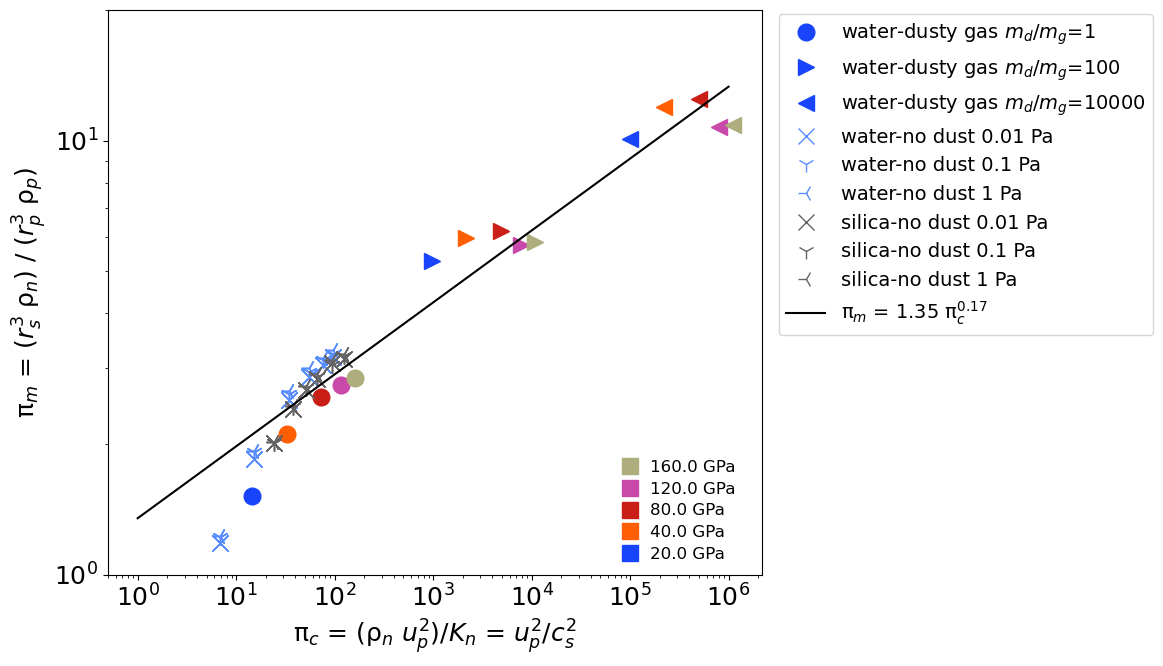

log fit and covariance matrix =  [0.16568046 0.12964904] [[ 0.00012852 -0.00049172]
 [-0.00049172  0.00217774]]


In [6]:
plt.figure(figsize=(12,7)) 
plt.rcParams.update({'font.size': 18})
plt.rcParams['lines.markersize'] = 12

#plumedig.symarr = ['x','>','<']
plumedig.symarr = ['o','>','<']
plumewater.symarr = ['x','1','3']
plumesilica.symarr= ['x','1','3']
#pcol = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
wcol="#578dff"
scol="#656364"

#wcol='cyan'
#scol='grey'
allcauchy = np.zeros(0)
allpimass = np.zeros(0)


for ineb in range(len(plumedig.pneb)):
    for ipp in range(len(plumedig.pinitarr)):
#        if ineb == 0:
#            plt.plot(plumedig.cauchy[ipp,:,ineb],plumedig.pimass[ipp,:,ineb],plumedig.symarr[ineb],label='water-dusty gas '+str(plumedig.pinitarr[ipp]/1.e9)+' GPa, '+plumedig.labelneb[ineb])
#        else:
        if ipp == 0:
            plt.plot(plumedig.cauchy[ipp,:,ineb],plumedig.pimass[ipp,:,ineb],plumedig.symarr[ineb],color=pcol[ipp],label='water-dusty gas '+str(plumedig.labelneb[ineb]))
        else:
            plt.plot(plumedig.cauchy[ipp,:,ineb],plumedig.pimass[ipp,:,ineb],plumedig.symarr[ineb],color=pcol[ipp])#,label=str(plumedig.pinitarr[ipp]/1.e9)+' GPa, '+plumedig.labelneb[ineb])
        iii = np.where(plumedig.cauchy[ipp,:,ineb] > 25)[0]
        if len(iii)>0:
            allcauchy=np.append(allcauchy,plumedig.cauchy[ipp,iii,ineb])
            allpimass=np.append(allpimass,plumedig.pimass[ipp,iii,ineb])
for ineb in range(len(plumewater.pneb)):
    for ipp in range(len(plumewater.pinitarr)):
        if ipp == 0:
            plt.plot(plumewater.cauchy[ipp,:,ineb],plumewater.pimass[ipp,:,ineb],plumewater.symarr[ineb],color=wcol,label='water-no dust '+str(plumewater.labelneb[ineb]))
        else:
            plt.plot(plumewater.cauchy[ipp,:,ineb],plumewater.pimass[ipp,:,ineb],plumewater.symarr[ineb],color=wcol)#,label=str(plumewater.pinitarr[ipp]/1.e9)+' GPa, '+plumewater.pneb[ineb])
        #iii = np.where(plumewater.cauchy[ipp,:,ineb] > 25)[0]
        #if len(iii)>0:
            #print(len(iii),plumewater.cauchy[ipp,iii,ineb])
            #allcauchy=np.append(allcauchy,plumewater.cauchy[ipp,iii,ineb])
            #allpimass=np.append(allpimass,plumewater.pimass[ipp,iii,ineb])

for ineb in range(len(plumesilica.pneb)):
    for ipp in range(len(plumesilica.pinitarr)):
        if ipp == 0:
            plt.plot(plumesilica.cauchy[ipp,:,ineb],plumesilica.pimass[ipp,:,ineb],plumesilica.symarr[ineb],color=scol,label='silica-no dust '+str(plumesilica.labelneb[ineb]))
        else:
            plt.plot(plumesilica.cauchy[ipp,:,ineb],plumesilica.pimass[ipp,:,ineb],plumesilica.symarr[ineb],color=scol)#,label=str(plumedig.pinitarr[ipp]/1.e9)+' GPa, '+plumedig.pneb[ineb])

#print(allcauchy)
#print(allpimass)

res = np.polyfit(np.log10(allcauchy),np.log10(allpimass),1)
res,cov = np.polyfit(np.log10(allcauchy),np.log10(allpimass),1,cov=True)
print('fit only dig = ',res,np.power(10.,res[1]))
#plt.plot(allcauchy,allpimass,'k.')
xxx = np.power(10,range(0,7))
#plt.plot(xxx,np.power(10.,res[1]+res[0]*np.log10(xxx)),label='log$_{10}$ π$_{m}$ = 0.135 + 0.17 log$_{10}$ π$_c$')
plt.plot(xxx,1.35*np.power(xxx,res[0]),'k',label='π$_{m}$ = 1.35 π$_c^{0.17}$')
print(np.power(10.,res[1]))
# add pressure legend
ineb=0
yval=np.power(10,(np.arange(6)+1)/20)
for ipp in range(len(plumedig.pinitarr)):
    plt.plot(1.e5,yval[ipp],'s',color=pcol[ipp])#,label='water-dusty gas '+str(plumedig.pinitarr[ipp]/1.e9)+' GPa')
    plt.text(1.6e5,yval[ipp]*.97,str(plumedig.pinitarr[ipp]/1.e9)+' GPa',fontsize=12)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('π$_{c}$ = (ρ$_n$ $u_p^2$)/$K_n$ = $u_p^2$/$c_s^2$')
#plt.ylabel('Displaced nebula mass / Initial plume mass')
plt.ylabel('π$_{m}$ = ($r_s^3$ ρ$_n$) / ($r_p^3$ ρ$_p$)')
plt.ylim([1,20])
#plt.title('Nebular mass displaced at stall radius')
plt.legend(bbox_to_anchor= (1.01, 1.01),fontsize=14)
plt.tight_layout()
plt.savefig('./plots/Fig10-plume-all-picauchy-pimass.pdf')
plt.show()

print('log fit and covariance matrix = ',res,cov)


fit all =  [ 1.04023665 -0.55931397] 0.2758582817289531
0.2758582817289531


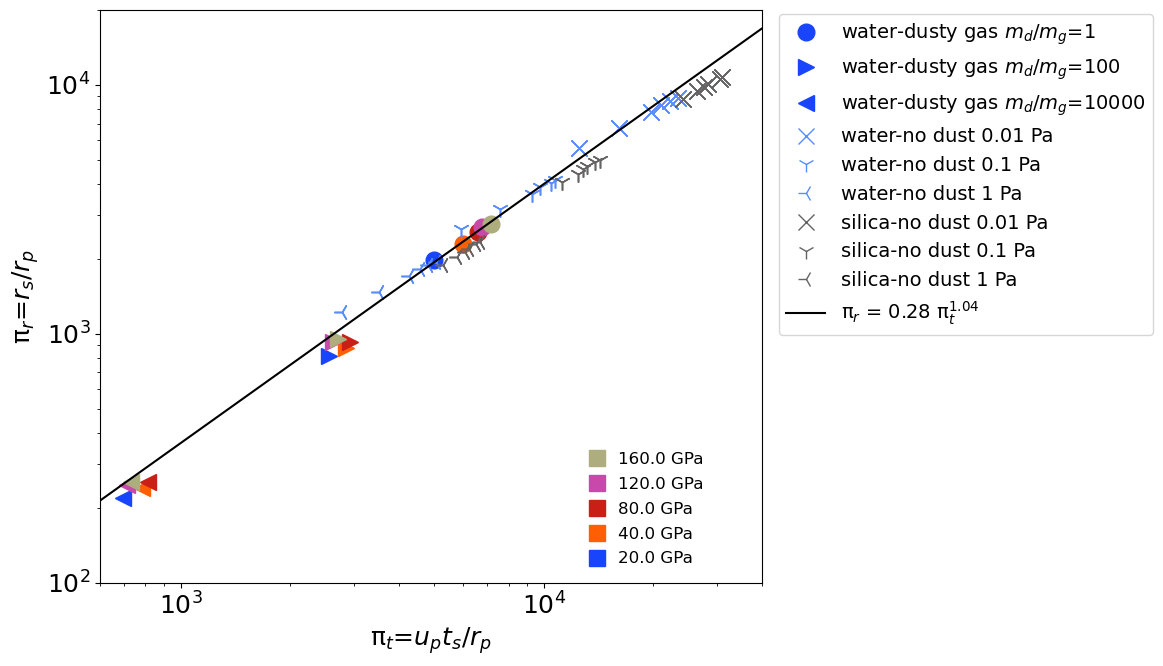

log fit and covariance matrix =  [ 1.04023665 -0.55931397] [[ 9.10405834e-05 -3.49911677e-04]
 [-3.49911677e-04  1.35759165e-03]]


In [7]:
#plumedig.symarr = ['.','>','<']

plt.figure(figsize=(12,7)) 
plt.rcParams.update({'font.size': 18})
plt.rcParams['lines.markersize'] = 12

#plumedig.symarr = ['x','>','<']
#plumewater.symarr = ['.','1','3']
#plumesilica.symarr= ['.','1','3']
#pcol = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


plumedig.symarr = ['o','>','<']
plumewater.symarr = ['x','1','3']
plumesilica.symarr= ['x','1','3']
wcol="#578dff"
scol="#656364"
#wcol='cyan'
#scol='grey'

allpitime = np.zeros(0)
allpiradius = np.zeros(0)

for ineb in range(len(plumedig.pneb)):
    for ipp in range(len(plumedig.pinitarr)):
        if ipp == 0:
            plt.plot(plumedig.pitime[ipp,:,ineb],plumedig.piradius[ipp,:,ineb],plumedig.symarr[ineb],color=pcol[ipp],label='water-dusty gas '+str(plumedig.labelneb[ineb]))
        else:
            plt.plot(plumedig.pitime[ipp,:,ineb],plumedig.piradius[ipp,:,ineb],plumedig.symarr[ineb],color=pcol[ipp])#,label=str(plumedig.pinitarr[ipp]/1.e9)+' GPa, '+plumedig.pneb[ineb])
        iii = np.where(plumedig.cauchy[ipp,:,ineb] > 0)[0]
        if len(iii)>0:
            allpitime=np.append(allpitime,plumedig.pitime[ipp,iii,ineb])
            allpiradius=np.append(allpiradius,plumedig.piradius[ipp,iii,ineb])



for ineb in range(len(plumewater.pneb)):
    for ipp in range(len(plumewater.pinitarr)):
        if ipp == 0:
            plt.plot(plumewater.pitime[ipp,:,ineb],plumewater.piradius[ipp,:,ineb],plumewater.symarr[ineb],color=wcol,label='water-no dust '+str(plumewater.labelneb[ineb]))
        else:
            plt.plot(plumewater.pitime[ipp,:,ineb],plumewater.piradius[ipp,:,ineb],plumewater.symarr[ineb],color=wcol)#,label=str(plumewater.pinitarr[ipp]/1.e9)+' GPa, '+plumewater.pneb[ineb])
        iii = np.where(plumewater.cauchy[ipp,:,ineb] > 0)[0]
        if len(iii)>0:
            allpitime=np.append(allpitime,plumewater.pitime[ipp,iii,ineb])
            allpiradius=np.append(allpiradius,plumewater.piradius[ipp,iii,ineb])

for ineb in range(len(plumesilica.pneb)):
    for ipp in range(len(plumesilica.pinitarr)):
        if ipp == 0:
            plt.plot(plumesilica.pitime[ipp,:,ineb],plumesilica.piradius[ipp,:,ineb],plumesilica.symarr[ineb],color=scol,label='silica-no dust '+str(plumesilica.labelneb[ineb]))
        else:
            plt.plot(plumesilica.pitime[ipp,:,ineb],plumesilica.piradius[ipp,:,ineb],plumesilica.symarr[ineb],color=scol)#,label=str(plumedig.pinitarr[ipp]/1.e9)+' GPa, '+plumedig.pneb[ineb])

res = np.polyfit(np.log10(allpitime),np.log10(allpiradius),1)
res,cov = np.polyfit(np.log10(allpitime),np.log10(allpiradius),1,cov=True)
print('fit all = ',res,np.power(10.,res[1]))
#plt.plot(allpitime,allpiradius,'k.')
xxx = np.power(10,np.arange(2.6,5.,.4))
#plt.plot(xxx,np.power(10.,res[1]+res[0]*np.log10(xxx)),label='π$_{m}$ = 1.347 π$_c^{0.166}$')
plt.plot(xxx,np.power(10.,res[1])*np.power(xxx,res[0]),'k',label='π$_{r}$ = 0.28 π$_t^{1.04}$')
#plt.plot(xxx,.4*xxx,label='π$_{r}$ = 0.3 π$_t$')
print(np.power(10.,res[1]))
# add pressure legend
ineb=0
yval=np.power(10,(np.arange(6)+1)/10+2)
for ipp in range(len(plumedig.pinitarr)):
    plt.plot(1.4e4,yval[ipp],'s',color=pcol[ipp])#,label='water-dusty gas '+str(plumedig.pinitarr[ipp]/1.e9)+' GPa')
    plt.text(1.6e4,yval[ipp]*.95,str(plumedig.pinitarr[ipp]/1.e9)+' GPa',fontsize=12)


plt.xlabel('π$_t$=$u_p t_s$/$r_p$')
plt.ylabel('π$_r$=$r_s$/$r_p$')
#plt.title('Scaled stall radius to scaled stall time')


plt.yscale('log')
plt.xscale('log')
plt.xlim([600,40000])
plt.ylim(100,20000)
plt.legend(bbox_to_anchor= (1.01, 1.01),fontsize=14)
plt.tight_layout()
plt.savefig('./plots/Fig11-plume-all-pitime-piradius.pdf')
plt.show()
print('log fit and covariance matrix = ',res,cov)